In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/PhD_Assignment/"

Mounted at /content/drive
/content/drive/MyDrive/PhD_Assignment


### **Case1 - Exploring Electronic Health Records**

In this case you are instructed to explore a synthetic dataset comprised of Electronic Health Records (EHR). EHR data is generally a collection of medical-related records at patient-level where it is not uncommon to find components such as: demographic data (patient gender, age, etc.), medications (which medications and prescribed and if these are dispensed from the pharmacy), medical history (e.g. diagnose codes, treatment codes and where and when the patients visited the hospital), lab results and vital signs.

**1. Load the Data**

In [ ]:
import numpy as np
import pandas as pd
from utils import plot_freq_top10, plot_freq_top5, calculateAge, generate_patient_dataframe
import matplotlib.pyplot as plt

csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
csv_name = "allergies"

# Using pandas package and read_csv function,
# load the csv file
dataFrame = pd.read_csv(csv_base_path + csv_name + ".csv")
dataFrame.head(5)

# Select one example of patient ID
pat_id = '76982e06-f8b8-4509-9ca3-65a99c8650fe'

patient = dataFrame[dataFrame['PATIENT']== pat_id]
patient.head(5)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy


The number of unique conditions: 129


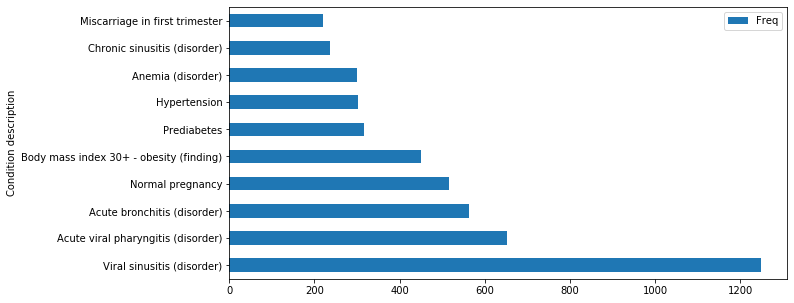

In [ ]:
# Load the condition csv
csv_name = "conditions"
temp_dataframe_01 = pd.read_csv(csv_base_path + csv_name + ".csv")

# Check the number of unique conditions, select with code
num_unique_conditions = temp_dataframe_01['CODE'].nunique()
print('The number of unique conditions:', num_unique_conditions)

# Group the data by code and description and count the frequency
grouped_data = temp_dataframe_01.groupby(['CODE', 'DESCRIPTION']).size().reset_index(name='Freq')

# Sort the data by frequency in descending order and select top 10
top_10_data = grouped_data.sort_values('Freq', ascending=False).head(10)

# Plot the top 10 data
top_10_data.plot.barh(x='DESCRIPTION', y='Freq', figsize=(10, 5))
plt.ylabel('Condition description')
plt.show()

In [ ]:
# Check top highest 3 condition & code
top_3_data = grouped_data.sort_values('Freq', ascending=False).head(3)
top_3_cond_desc = top_3_data['DESCRIPTION'].to_list()
top_3_cond_list = top_3_data['CODE'].to_list()
print(top_3_cond_desc)
print(top_3_cond_list)

['Viral sinusitis (disorder)', 'Acute viral pharyngitis (disorder)', 'Acute bronchitis (disorder)']
[444814009, 195662009, 10509002]


In [ ]:
# Since Synthea dataset is patient-wise dataset,
# We need to extract the top 3 codes of highest frequency of condition
# Which are
# Viral sinusitis (disorder)         : 444814009  
# Acute viral pharyngitis (disorder) : 195662009  
# Acute bronchitis (disorder)        : 10509002   

# Extract the patients ID in each condition code
patient_data_list_VS = temp_dataframe_01[temp_dataframe_01['CODE'] == top_3_cond_list[0]]['PATIENT'].to_list()
patient_data_list_AV = temp_dataframe_01[temp_dataframe_01['CODE'] == top_3_cond_list[1]]['PATIENT'].to_list()
patient_data_list_AB = temp_dataframe_01[temp_dataframe_01['CODE'] == top_3_cond_list[2]]['PATIENT'].to_list()

## **Viral sinuitis case**

Check the care plans on **Viral sinuitis** condition case

In [ ]:
# Load careplan csv file
csv_name = "careplans"
careplan_df = pd.read_csv(csv_base_path + csv_name + ".csv")

num_unique_careplan = careplan_df['CODE'].nunique()
print(num_unique_careplan)

32


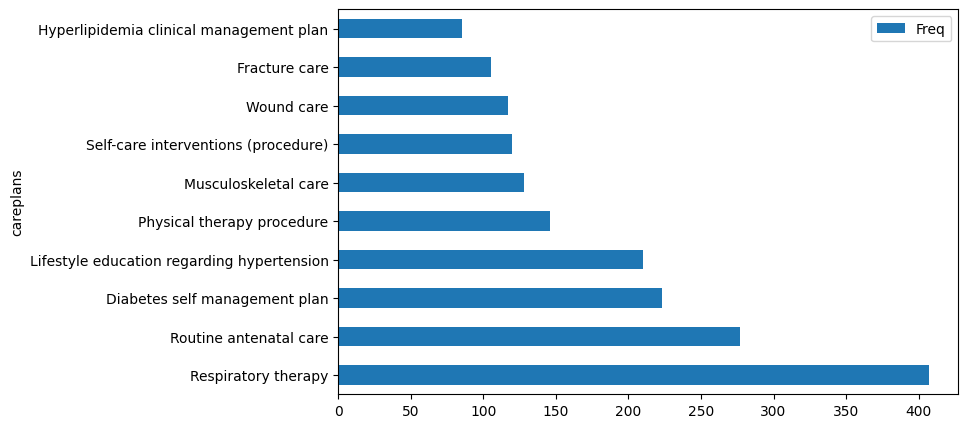

In [ ]:
# Plot the frequency of the care plan on Viral sinuitis
plot_freq_top10(careplan_df, patient_data_list_VS, csv_name)

### Top 3 care plan for **Viral sinuitis**

**Respiratory therapy** = Care for patients who have trouble breathing

**Routine antenatal care** = Antenatal care is the care you get from health professionals during your pregnancy.

**Diabetes self management plan**



---



## **Acute viral pharyngitis**

Check the care plans on **Acute viral pharyngitis** condition case


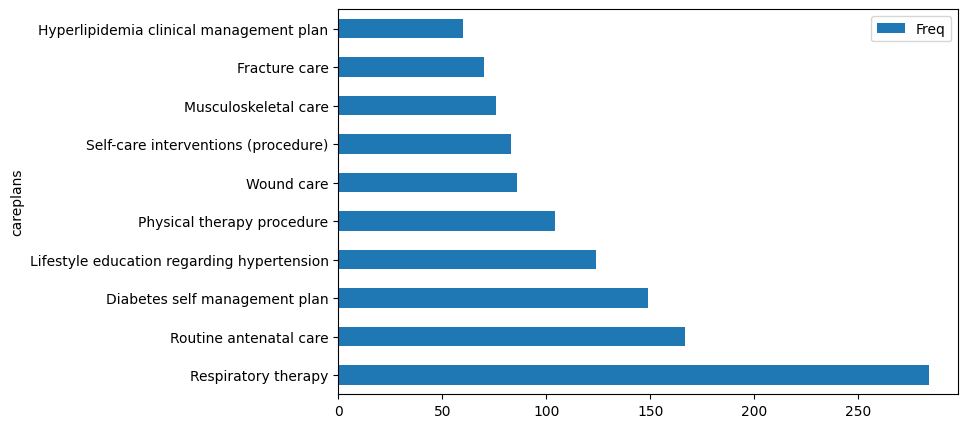

In [ ]:
# Plot the frequency of the care plan on Acute viral pharyngitis
plot_freq_top10(careplan_df, patient_data_list_AV, csv_name)

### Top 3 care plan for **Acute viral pharyngitis**

**Respiratory therapy** = Care for patients who have trouble breathing

**Routine antenatal care** = Antenatal care is the care you get from health professionals during your pregnancy.

**Diabetes self management plan**



---



## **Acute bronchitis**

Check the care plans on **Acute bronchitis** condition case


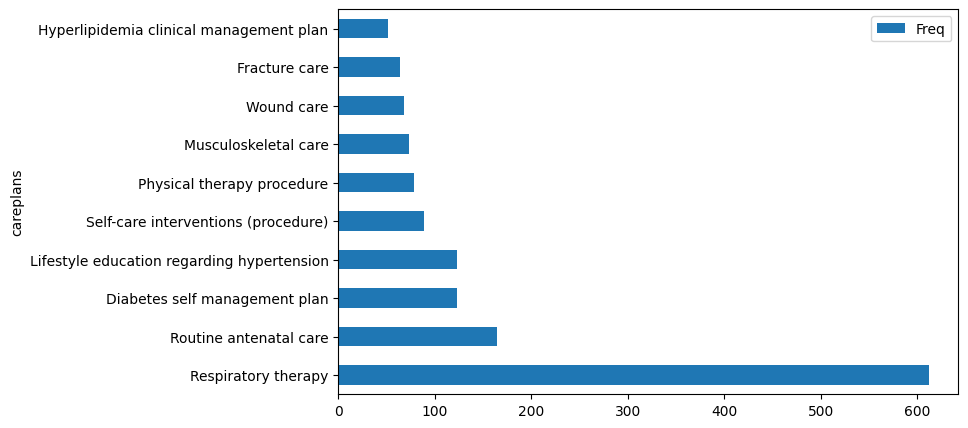

In [ ]:
# Plot the frequency of the care plan on Acute bronchitis
plot_freq_top10(careplan_df, patient_data_list_AB, csv_name)

### Top 3 care plan for **Acute bronchitis**

**Respiratory therapy** = Care for patients who have trouble breathing

**Routine antenatal care** = Antenatal care is the care you get from health professionals during your pregnancy.

**Diabetes self management plan** and **Lifestyle education regarding hypertension**

Those three conditions: **Viral sinuitis**, **Acute viral pharyngitis**, **Acute bronchitis** have similarity in terms of '**careplan**' such as **Respiratory therapy**, **Routine antenatal care** and **Diabetes self management plan**



---



In other case, we can check **medications**, **observation** and **immunization** as well.

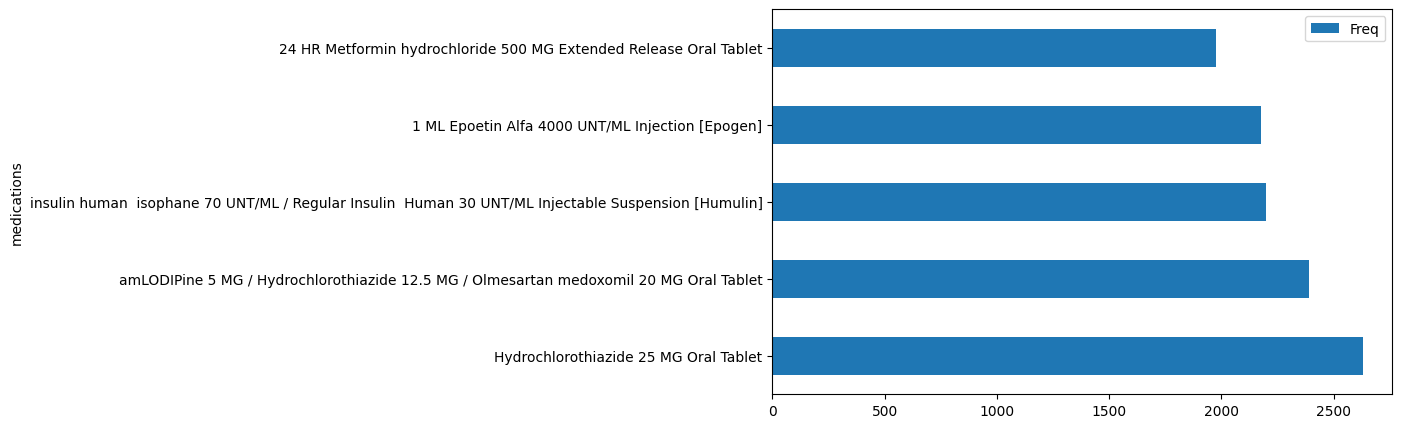

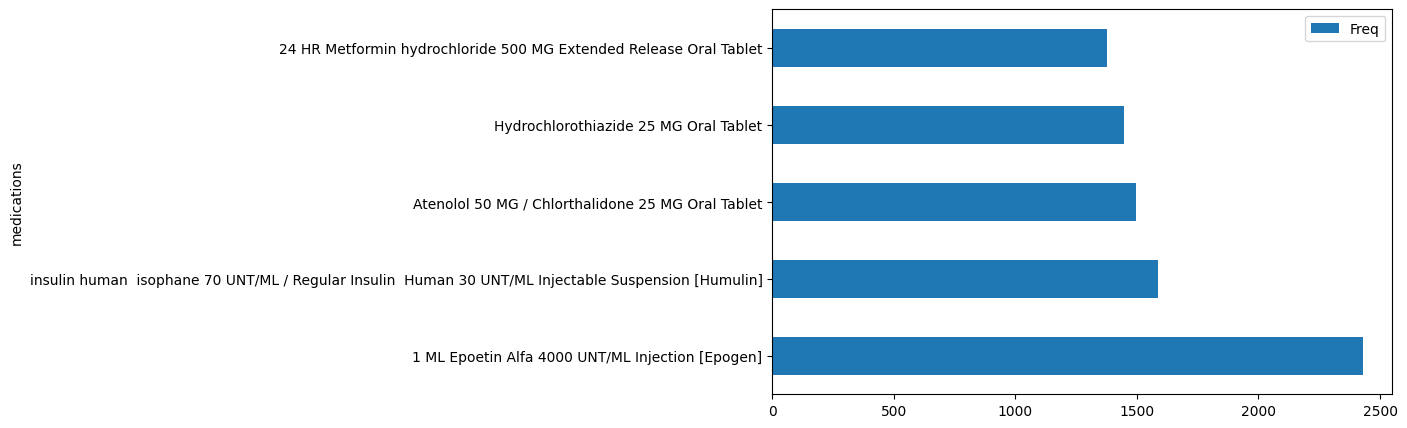

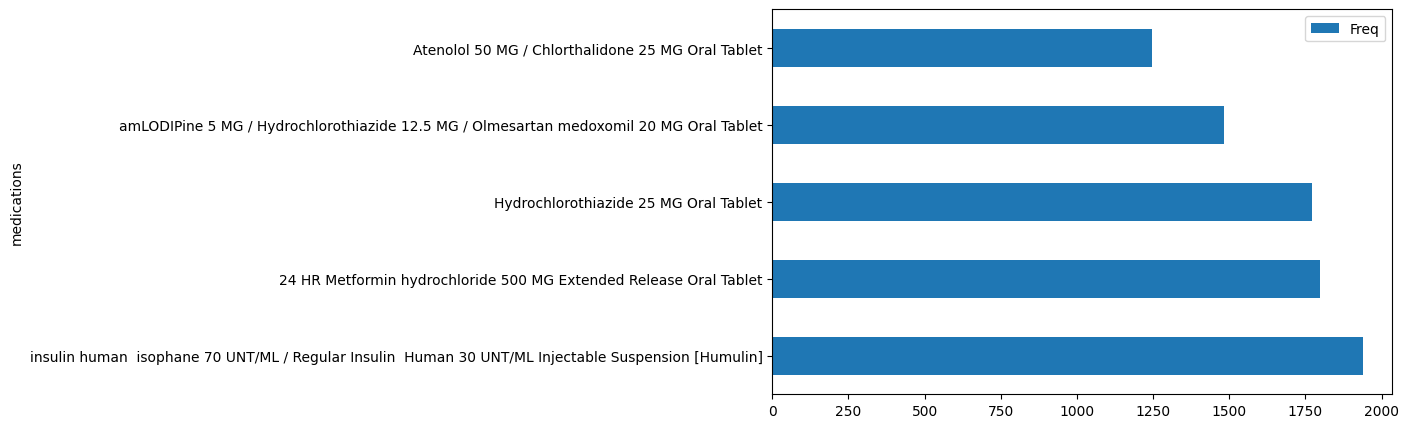

131


In [ ]:
csv_name = "medications"
medications_df = pd.read_csv(csv_base_path + csv_name + ".csv")
num_unique_medi = medications_df['CODE'].nunique()

plot_freq_top5(medications_df, patient_data_list_VS, csv_name)
plot_freq_top5(medications_df, patient_data_list_AV, csv_name)
plot_freq_top5(medications_df, patient_data_list_AB, csv_name)
print(num_unique_medi)

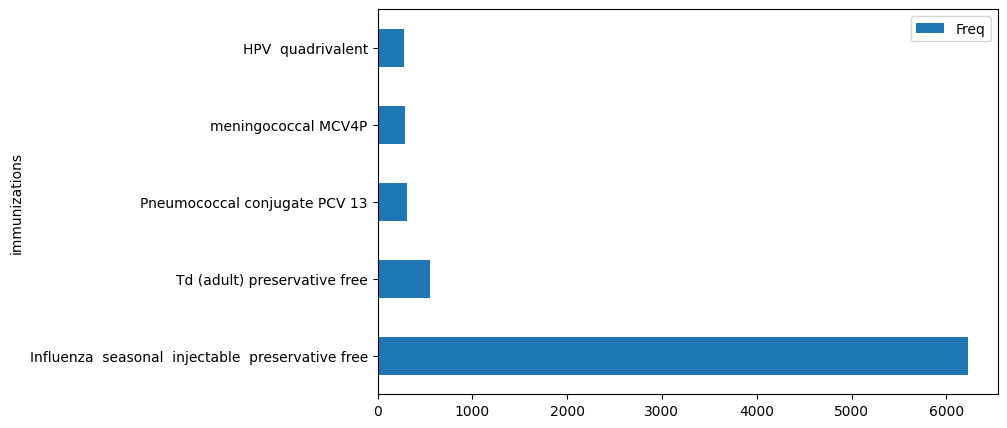

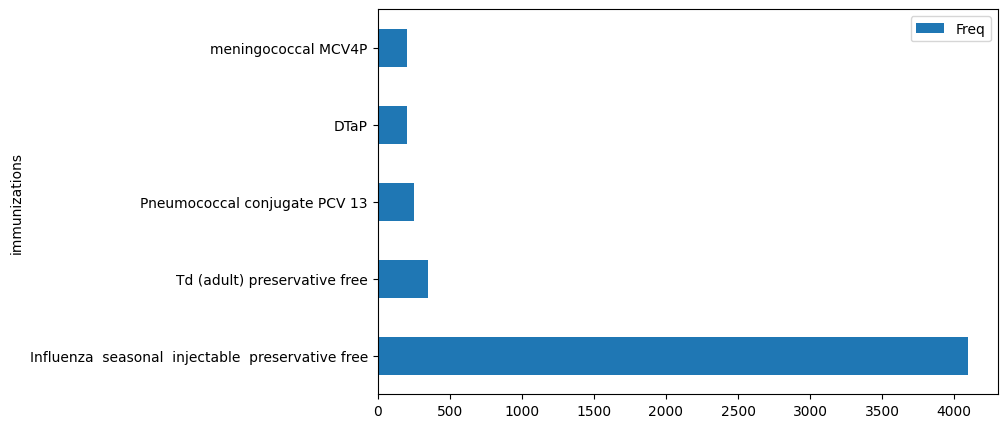

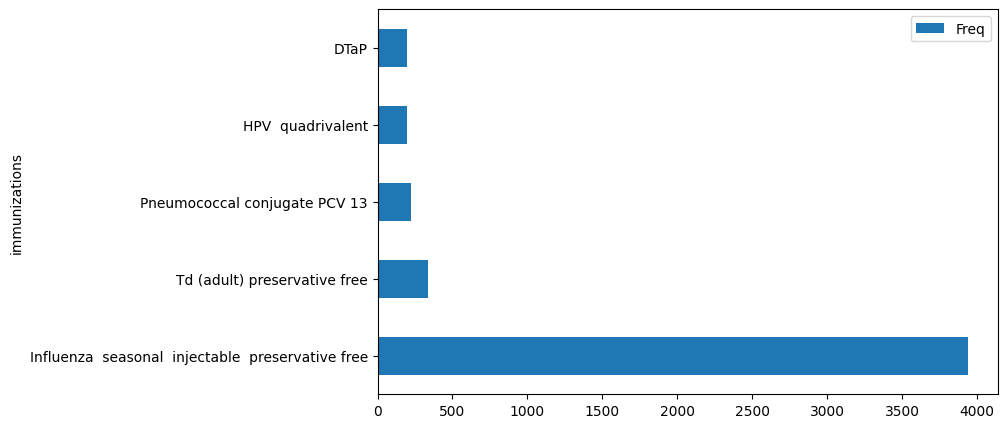

18


In [ ]:
csv_name = "immunizations"
immun_df = pd.read_csv(csv_base_path + csv_name + ".csv")

num_unique_immun = immun_df['CODE'].nunique()

plot_freq_top5(immun_df, patient_data_list_VS, csv_name)
plot_freq_top5(immun_df, patient_data_list_AV, csv_name)
plot_freq_top5(immun_df, patient_data_list_AB, csv_name)
print(num_unique_immun)

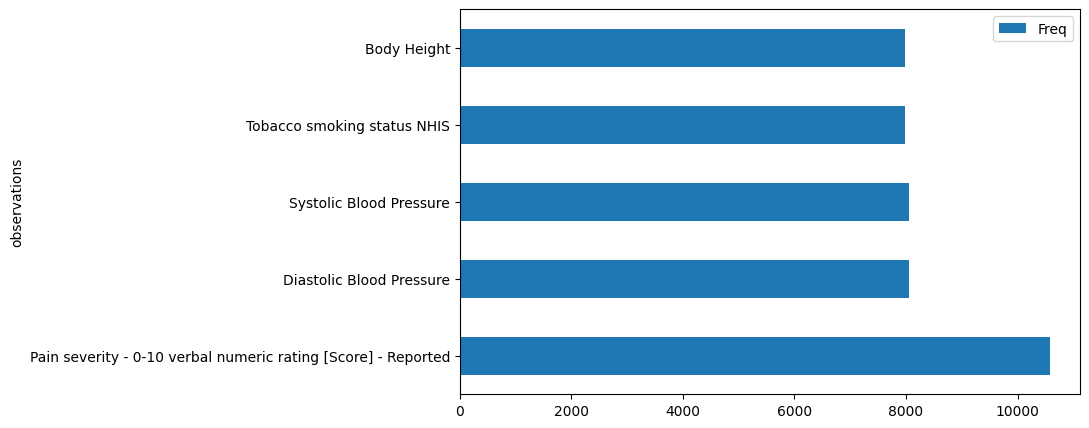

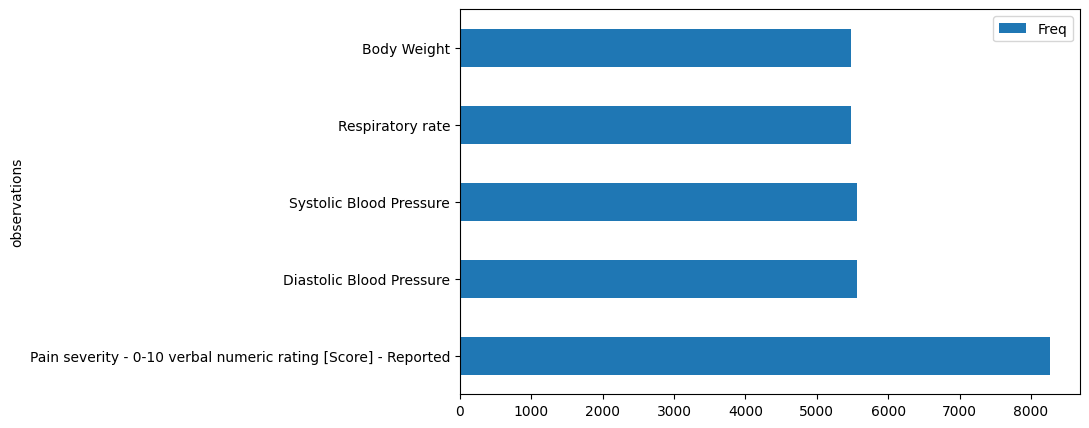

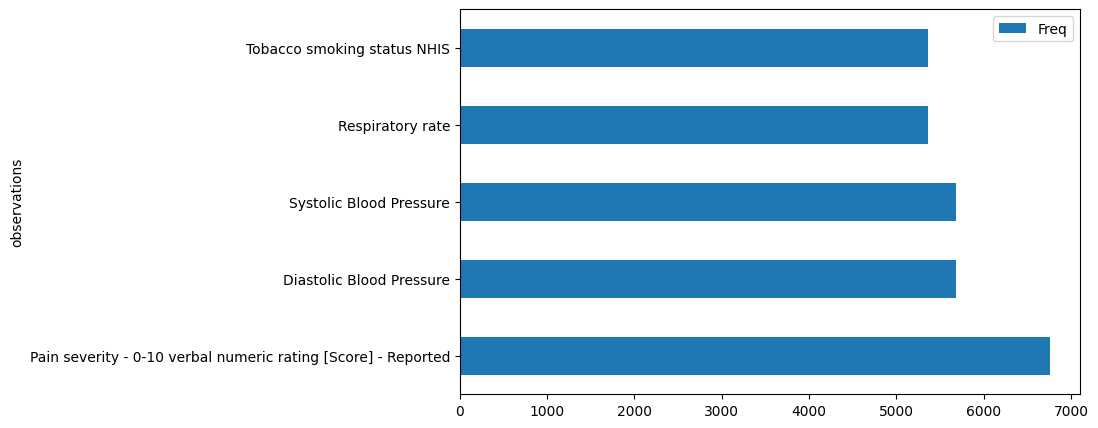

In [ ]:
csv_name = "observations"
observ_df = pd.read_csv(csv_base_path + csv_name + ".csv")
plot_freq_top5(observ_df, patient_data_list_VS, csv_name)
plot_freq_top5(observ_df, patient_data_list_AV, csv_name)
plot_freq_top5(observ_df, patient_data_list_AB, csv_name)

----------

## Hypothesis.1

Careplan prediction.
In this implementation, simply add every relavant information for utilizing input data and try to figure out which column doesn't have any impact on the performance in a positive perspective.

**Input :**

1. Patient ID
2. Age
3. Gender
4. Ethnic
5. Race
6. immunization code
7. Medication code
8. Condition code
9. Observation code
10. Allergy code

Class:

1. Careplan code

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from utils import get_patients_list, generate_patient_dataframe, gen_new_dataframe


In [ ]:
# Load hypothesis1 case
merged_df = pd.read_csv('synthea_sample_data_csv_apr2020/csv/hypothesis1.csv')
merged_df

,pat_id,Age,Gender,Ethnic,Race,imm_code,med_code,cond_code,obs_code,alrg_code,care_code
0,76982e06-f8b8-4509-9ca3-65a99c8650fe,40,1,1,4,17,66,50,100,6,1
1,76982e06-f8b8-4509-9ca3-65a99c8650fe,40,1,1,4,17,66,50,100,6,0
2,76982e06-f8b8-4509-9ca3-65a99c8650fe,40,1,1,4,17,66,50,100,5,1
3,76982e06-f8b8-4509-9ca3-65a99c8650fe,40,1,1,4,17,66,50,100,5,0
4,76982e06-f8b8-4509-9ca3-65a99c8650fe,40,1,1,4,17,66,50,99,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2619489,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62,1,1,4,17,72,40,3,10,0
2619490,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62,1,1,4,17,72,40,6,10,2
2619491,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62,1,1,4,17,72,40,6,10,0
2619492,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62,1,1,4,17,72,40,25,10,2


### Data prepare
Following code will generate the hypothesis 1 dataframe

In [ ]:
# # In this hypothesis implementation, select patients list who have top 5 careplan
# # Prepare the dataframe
# csv_name = "careplans"
# csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
# column = ['CODE', 'DESCRIPTION']
# top_num = 3
# patients_list, cd_list = get_patients_list(csv_base_path, csv_name, column, top_num)
# pat_df = generate_patient_dataframe(csv_base_path, patients_list)

# # Get medications dataframe
# # Patient's ID and Medication Code
# csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
# csv_name = "medications"
# column = {"pat_id": [], "med_code": []}
# med_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

# # Get immunizations dataframe
# # Patient's ID and Immunizations Code
# csv_name = "immunizations"
# column = {"pat_id": [], "imm_code": []}
# imm_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

# # Get conditions dataframe
# # Patient's ID and Conditions Code
# csv_name = "conditions"
# column = {"pat_id": [], "cond_code": []}
# cond_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

# # Get observation dataframe
# # Patient's ID and Observation Code
# csv_name = "observations"
# column = {"pat_id": [], "obs_code": []}
# obs_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

# # Get allergies dataframe
# # Patient's ID and Allergies Code
# csv_name = "allergies"
# column = {"pat_id": [], "alrg_code": []}
# alrg_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

# # Get Care plan
# csv_name = "careplans"
# careplan_df = pd.read_csv(csv_base_path + csv_name + ".csv")
# careplan_df = careplan_df[careplan_df['CODE'].isin(cd_list)]


# care_df = pd.DataFrame({"pat_id": [], "care_code": []})
# for i in range(len(careplan_df)) :
#   # Bring patient's ID and age  
#   care_df.loc[i] = [careplan_df.iloc[i]["PATIENT"], careplan_df.iloc[i]["CODE"]]

# # In this case, there are also same immunization code but different encounter
# # conduct drop duplicate.
# care_df = care_df.drop_duplicates(keep='first', ignore_index=True)

In [ ]:
# # We have patient ID and Age dataframe work, then we can merge the dataframe all together
# merged_df = pd.merge(pat_df, imm_df, on=('pat_id'))
# merged_df = pd.merge(merged_df, med_df, how='left', on=('pat_id'))
# merged_df = pd.merge(merged_df, cond_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, obs_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, alrg_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, care_df, how='left',  on=('pat_id'))


# # Drop NaN value
# merged_df.dropna(inplace=True)

# # Check each code length
# print(len(np.unique(merged_df['imm_code'].to_list())))
# print(len(np.unique(merged_df['med_code'].to_list())))
# print(len(np.unique(merged_df['cond_code'].to_list())))
# print(len(np.unique(merged_df['care_code'].to_list())))
# print(len(np.unique(merged_df['obs_code'].to_list())))
# print(len(np.unique(merged_df['alrg_code'].to_list())))


# # Generate & Replace the actual value into integer number
# immCodeList = np.unique(merged_df['imm_code'].to_list())
# immCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(immCodeList, 0)])
# medCodeList = np.unique(merged_df['med_code'].to_list())
# medCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(medCodeList, 0)])
# condCodeList = np.unique(merged_df['cond_code'].to_list())
# condCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(condCodeList, 0)])
# careCodeList = np.unique(merged_df['care_code'].to_list())
# careCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(careCodeList, 0)])
# obsCodeList = np.unique(merged_df['obs_code'].to_list())
# obsCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(obsCodeList, 0)])
# alrgCodeList = np.unique(merged_df['alrg_code'].to_list())
# alrgCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(alrgCodeList, 0)])

# # Replace
# merged_df['imm_code'] = merged_df['imm_code'].replace(immCodeLabel)
# merged_df['med_code'] = merged_df['med_code'].replace(medCodeLabel)
# merged_df['cond_code'] = merged_df['cond_code'].replace(condCodeLabel)
# merged_df['care_code'] = merged_df['care_code'].replace(careCodeLabel)
# merged_df['obs_code'] = merged_df['obs_code'].replace(obsCodeLabel)
# merged_df['alrg_code'] = merged_df['alrg_code'].replace(alrgCodeLabel)
# merged_df.to_csv('synthea_sample_data_csv_apr2020/csv/hypothesis1.csv', index=False)

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 1, 32)          128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 1, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 1, 64)          6208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 128)         8320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

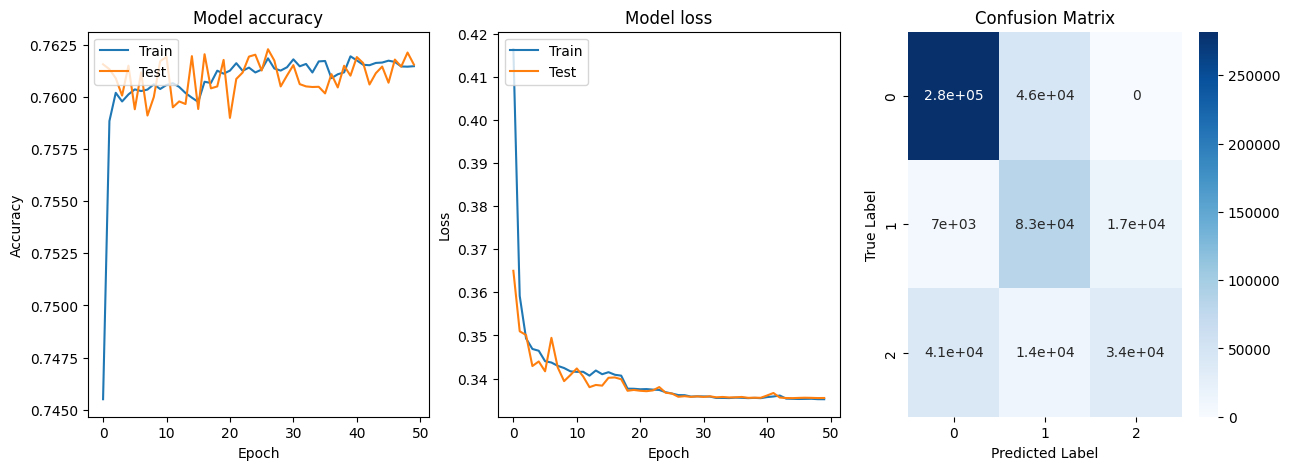

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Load and preprocess the data
X = merged_df.drop(['care_code','pat_id'], axis=1)
y = merged_df['care_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reshape input data to 4D tensor with shape (samples, rows, cols, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))


# Define the model architecture
# Define the input shape
# Define the model
with tf.device(tf.test.gpu_device_name()):
  model = Sequential()
  # Add the first convolutional layer
  model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=256, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  # model.add(Conv2D(filters=1024, kernel_size=(1, 1), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.2))  
  model.add(Dense(units=3, activation='softmax'))

  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  # Train the model
  # model.fit()
  # model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))
  history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=512, validation_data=(X_test_cnn, y_test), callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy:', test_acc)

# Create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Accuracy plot
axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Model accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend(["Train", "Test"], loc="upper left")

# Loss plot
axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Model loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(["Train", "Test"], loc="upper left")

# Generate predictions
y_pred = np.argmax(model.predict(X_test_cnn), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)


# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[2])
axs[2].set_title('Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# Compute the metrics
target_names = ['Respiratory therapy', 'Routine antenatal care', 'Diabetes self management plan']#, 'Lifestyle education regarding hypertension', 'Physical therapy procedure']  # replace ... with other class names
print(classification_report(np.argmax(y_test, axis=-1), y_pred, target_names=target_names))


                               precision    recall  f1-score   support

          Respiratory therapy       0.85      0.86      0.86    327486
       Routine antenatal care       0.58      0.77      0.67    107722
Diabetes self management plan       0.66      0.38      0.48     88691

                     accuracy                           0.76    523899
                    macro avg       0.70      0.67      0.67    523899
                 weighted avg       0.77      0.76      0.75    523899



### Correlation between the columns and Update
To analyse the correlation among the input data, correlation function is used. Based on the correlation matrix, the medication code has negative impact.

In [ ]:
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Print the correlation matrix
print(corr_matrix)

                Age    Gender    Ethnic      Race  imm_code  med_code  \
Age        1.000000  0.264810  0.096334  0.248524  0.396036  0.049404   
Gender     0.264810  1.000000 -0.059767  0.375527  0.276773 -0.042240   
Ethnic     0.096334 -0.059767  1.000000 -0.188284 -0.070812  0.059811   
Race       0.248524  0.375527 -0.188284  1.000000  0.206317  0.045312   
imm_code   0.396036  0.276773 -0.070812  0.206317  1.000000  0.032081   
med_code   0.049404 -0.042240  0.059811  0.045312  0.032081  1.000000   
cond_code -0.009096  0.043702 -0.012337  0.044600  0.015655  0.002822   
obs_code  -0.242283 -0.048029 -0.010105 -0.038505 -0.088012 -0.002826   
alrg_code -0.146851 -0.002436 -0.075445 -0.066645 -0.026910 -0.006124   
care_code  0.599919  0.211618 -0.006761  0.209855  0.257061  0.024126   

           cond_code  obs_code  alrg_code  care_code  
Age        -0.009096 -0.242283  -0.146851   0.599919  
Gender      0.043702 -0.048029  -0.002436   0.211618  
Ethnic     -0.012337 -0.010105 

According to the correlation matrix, the medication code and condition code have relatively lower percentage of impact on the performance, especially on careplan code. Therefore, to improve the performance, I will omit the medication and condition code in the dataframe.

In [ ]:
import pandas as pd
import numpy as np
from utils import get_patients_list, generate_patient_dataframe, gen_new_dataframe

# Load hypothesis1 case
merged_df = pd.read_csv('synthea_sample_data_csv_apr2020/csv/hypothesis1.csv')


Top careplans code :  [53950000, 134435003, 698360004]
Number of patients:  773
773


In [ ]:
merged_df = merged_df.drop({'cond_code' , 'med_code'}, axis=1)
merged_df = merged_df.drop_duplicates(keep='first', ignore_index=True)
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Print the correlation matrix
print(corr_matrix)

                Age    Gender    Ethnic      Race  imm_code  obs_code  \
Age        1.000000  0.317831  0.152960  0.123965  0.412187 -0.217963   
Gender     0.317831  1.000000  0.163946  0.227978  0.255562 -0.051090   
Ethnic     0.152960  0.163946  1.000000 -0.248572  0.027942 -0.015944   
Race       0.123965  0.227978 -0.248572  1.000000  0.134755 -0.011713   
imm_code   0.412187  0.255562  0.027942  0.134755  1.000000 -0.081986   
obs_code  -0.217963 -0.051090 -0.015944 -0.011713 -0.081986  1.000000   
alrg_code -0.113207 -0.025089 -0.024990 -0.056005 -0.032947  0.018691   
care_code  0.570338  0.263498  0.041766  0.112951  0.252037 -0.134759   

           alrg_code  care_code  
Age        -0.113207   0.570338  
Gender     -0.025089   0.263498  
Ethnic     -0.024990   0.041766  
Race       -0.056005   0.112951  
imm_code   -0.032947   0.252037  
obs_code    0.018691  -0.134759  
alrg_code   1.000000  -0.045182  
care_code  -0.045182   1.000000  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 1, 32)          128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 1, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 64)          6208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 128)         8320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

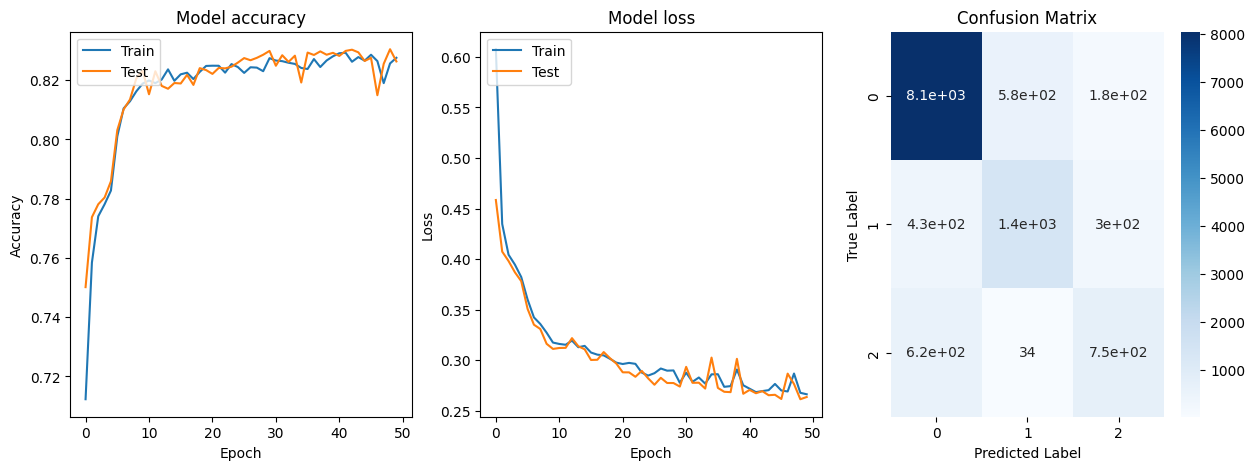

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Load and preprocess the data
X = merged_df.drop(['care_code','pat_id'], axis=1)
y = merged_df['care_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reshape input data to 4D tensor with shape (samples, rows, cols, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))


# Define the model architecture
# Define the input shape
# Define the model
with tf.device(tf.test.gpu_device_name()):
  model = Sequential()
  # Add the first convolutional layer
  model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=256, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  # model.add(Conv2D(filters=1024, kernel_size=(1, 1), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.2))  
  model.add(Dense(units=3, activation='softmax'))

  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  # Train the model
  # model.fit()
  # model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))
  history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=512, validation_data=(X_test_cnn, y_test), callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy:', test_acc)

# Create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Accuracy plot
axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Model accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend(["Train", "Test"], loc="upper left")

# Loss plot
axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Model loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(["Train", "Test"], loc="upper left")

# Generate predictions
y_pred = np.argmax(model.predict(X_test_cnn), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)


# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[2])
axs[2].set_title('Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# Compute the metrics
target_names = ['Respiratory therapy', 'Routine antenatal care', 'Diabetes self management plan']#, 'Lifestyle education regarding hypertension', 'Physical therapy procedure']  # replace ... with other class names
print(classification_report(np.argmax(y_test, axis=-1), y_pred, target_names=target_names))


                               precision    recall  f1-score   support

          Respiratory therapy       0.88      0.91      0.90      8811
       Routine antenatal care       0.70      0.66      0.68      2148
Diabetes self management plan       0.61      0.53      0.57      1404

                     accuracy                           0.83     12363
                    macro avg       0.73      0.70      0.71     12363
                 weighted avg       0.82      0.83      0.82     12363



After preprocess the dataframe, we can observe the better result. In the case of 'Respiratory therapy' has improved 4% and 'Diabetes self management plan' has 9% improvement. However, the 'Routine antenatal care' has improved only 1%. And accuracy has improved about 7%.

-----------------

## **Hypothesis 2.** 
### This implementation is based on the previous implementation. Adding date information would affect on the performance of the model in positive way potentially. Therefore, we will add immunization and observations date.



In [ ]:
import pandas as pd
import numpy as np
from utils import get_df, get_patients_list, generate_patient_dataframe, gen_new_dataframe

merged_df = pd.read_csv('synthea_sample_data_csv_apr2020/csv/hypothesis2.csv')
merged_df

,pat_id,Age,Gender,Ethnic,Race,imm_code,imm_year,imm_month,imm_day,obs_code,obs_year,obs_month,obs_day,alrg_code,care_code
0,76982e06-f8b8-4509-9ca3-65a99c8650fe,40.0,1,1,4,17,2010,11,10,100,2010,7,7,6,1
1,76982e06-f8b8-4509-9ca3-65a99c8650fe,40.0,1,1,4,17,2010,11,10,100,2010,7,7,6,0
2,76982e06-f8b8-4509-9ca3-65a99c8650fe,40.0,1,1,4,17,2010,11,10,100,2010,7,7,5,1
3,76982e06-f8b8-4509-9ca3-65a99c8650fe,40.0,1,1,4,17,2010,11,10,100,2010,7,7,5,0
4,76982e06-f8b8-4509-9ca3-65a99c8650fe,40.0,1,1,4,17,2010,11,10,99,2010,11,10,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150108,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62.0,1,1,4,17,1976,11,13,75,1977,3,28,10,0
1150109,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62.0,1,1,4,17,1976,11,13,13,1977,3,28,10,2
1150110,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62.0,1,1,4,17,1976,11,13,13,1977,3,28,10,0
1150111,13b9a676-7cfd-4b7c-bdb6-43ec52b7c919,62.0,1,1,4,17,1976,11,13,11,1977,3,28,10,2


### Data prepare
Following code will generate the hypothesis 2 dataframe

In [ ]:
# # In this hypothesis implementation, select patients list who have top 5 careplan
# # Prepare the dataframe
# csv_name = "careplans"
# csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
# column = ['CODE', 'DESCRIPTION']
# top_num = 3
# patients_list, cd_list = get_patients_list(csv_base_path, csv_name, column, top_num)
# pat_df = generate_patient_dataframe(csv_base_path, patients_list)

# # Get immunizations dataframe
# # Patient's ID and Immunizations Code
# csv_name = "immunizations"
# column = {"pat_id": [], "imm_code":[], "imm_year": [], "imm_month": [], "imm_day": []}
# imm_df = generate_df_ymd(csv_base_path, csv_name, column, patients_list)

# # Get observation dataframe
# # Patient's ID and Observation Code
# csv_name = "observations"
# column = {"pat_id": [], "obs_code": [], "obs_year": [], "obs_month": [], "obs_day": []}
# obs_df = generate_df_ymd(csv_base_path, csv_name, column, patients_list)

# # Get allergies dataframe
# # Patient's ID and Allergies Code
# csv_name = "allergies"
# column = {"pat_id": [], "alrg_code": []}
# alrg_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

# # Get Care plan
# csv_name = "careplans"
# column = {"pat_id": [], "care_code": []}
# careplan_df = pd.read_csv(csv_base_path + csv_name + ".csv")
# careplan_df = careplan_df[careplan_df['CODE'].isin(cd_list)]
# care_df = pd.DataFrame({
#         list(column.keys())[0]: careplan_df['PATIENT'],
#         list(column.keys())[1]: careplan_df['CODE']
#     }) 

# # In this case, there are also same immunization code but different encounter
# # conduct drop duplicate.
# care_df = care_df.drop_duplicates(keep='first', ignore_index=True)

Top careplans code :  [53950000, 134435003, 698360004]
Number of patients:  773
773


In [ ]:
# # We have patient ID and Age dataframe work, then we can merge the dataframe all together
# merged_df = pd.merge(pat_df, imm_df, on=('pat_id'))
# merged_df = pd.merge(merged_df, obs_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, alrg_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, care_df, how='left',  on=('pat_id'))


# # Drop NaN value
# merged_df.dropna(inplace=True)

# # Check each code length
# print(len(np.unique(merged_df['imm_code'].to_list())))
# print(len(np.unique(merged_df['care_code'].to_list())))
# print(len(np.unique(merged_df['obs_code'].to_list())))
# print(len(np.unique(merged_df['alrg_code'].to_list())))


# # Generate & Replace the actual value into integer number
# immCodeList = np.unique(merged_df['imm_code'].to_list())
# immCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(immCodeList, 0)])
# careCodeList = np.unique(merged_df['care_code'].to_list())
# careCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(careCodeList, 0)])
# obsCodeList = np.unique(merged_df['obs_code'].to_list())
# obsCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(obsCodeList, 0)])
# alrgCodeList = np.unique(merged_df['alrg_code'].to_list())
# alrgCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(alrgCodeList, 0)])

# # Replace
# merged_df['imm_code'] = merged_df['imm_code'].replace(immCodeLabel)
# merged_df['care_code'] = merged_df['care_code'].replace(careCodeLabel)
# merged_df['obs_code'] = merged_df['obs_code'].replace(obsCodeLabel)
# merged_df['alrg_code'] = merged_df['alrg_code'].replace(alrgCodeLabel)
# merged_df.to_csv('synthea_sample_data_csv_apr2020/csv/hypothesis2.csv', index=False)

18
3
115
15


In [ ]:
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Print the correlation matrix
print(corr_matrix)

                Age    Gender    Ethnic      Race  imm_code  imm_year  \
Age        1.000000  0.275250  0.043698  0.185751  0.454346 -0.169567   
Gender     0.275250  1.000000  0.076821  0.362838  0.251095  0.004746   
Ethnic     0.043698  0.076821  1.000000 -0.209025  0.002201 -0.066898   
Race       0.185751  0.362838 -0.209025  1.000000  0.175968 -0.052691   
imm_code   0.454346  0.251095  0.002201  0.175968  1.000000 -0.055284   
imm_year  -0.169567  0.004746 -0.066898 -0.052691 -0.055284  1.000000   
imm_month -0.096645 -0.069723 -0.040407  0.056785 -0.135434 -0.105361   
imm_day    0.063382  0.200202  0.047412  0.122666  0.101430 -0.001480   
obs_code  -0.293349 -0.033746  0.005415  0.000225 -0.120758  0.071771   
obs_year  -0.209780 -0.016575 -0.064034 -0.046046 -0.108164  0.678091   
obs_month  0.011948  0.047280 -0.097072  0.139380  0.040311 -0.024259   
obs_day   -0.003666  0.132321  0.026633  0.151985  0.034971 -0.030817   
alrg_code -0.109901 -0.018968 -0.019491 -0.067216 -

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 11, 1, 32)         128       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 1, 64)          6208      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 1, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 1, 128)         8320      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 1, 1, 128)       

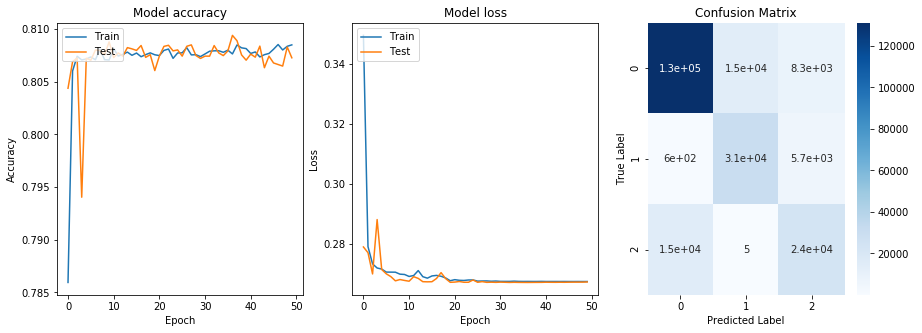

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Load and preprocess the data
X = merged_df.drop(['care_code','pat_id'], axis=1)
y = merged_df['care_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reshape input data to 4D tensor with shape (samples, rows, cols, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))


# Define the model architecture
# Define the input shape
# Define the model
with tf.device(tf.test.gpu_device_name()):
  model = Sequential()
  # Add the first convolutional layer
  model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=256, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  # model.add(Conv2D(filters=1024, kernel_size=(1, 1), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.2))  
  model.add(Dense(units=3, activation='softmax'))

  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  # Train the model
  # model.fit()
  # model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))
  history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=512, validation_data=(X_test_cnn, y_test), callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy:', test_acc)

# Create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Accuracy plot
axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Model accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend(["Train", "Test"], loc="upper left")

# Loss plot
axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Model loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(["Train", "Test"], loc="upper left")

# Generate predictions
y_pred = np.argmax(model.predict(X_test_cnn), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)


# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[2])
axs[2].set_title('Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# Compute the metrics
target_names = ['Respiratory therapy', 'Routine antenatal care', 'Diabetes self management plan']#, 'Lifestyle education regarding hypertension', 'Physical therapy procedure']  # replace ... with other class names
print(classification_report(np.argmax(y_test, axis=-1), y_pred, target_names=target_names))


                               precision    recall  f1-score   support

          Respiratory therapy       0.89      0.85      0.87    154070
       Routine antenatal care       0.68      0.83      0.75     37078
Diabetes self management plan       0.63      0.61      0.62     38875

                     accuracy                           0.81    230023
                    macro avg       0.73      0.76      0.75    230023
                 weighted avg       0.81      0.81      0.81    230023



Even though the test accuracy is less than Hypothesis 1, the f1 scores of 'Routine antenatal care' and 'Diabetes self management plan' are better, but Respiratory therapy has 3% lower.

---------------------------

# Hypothesis.3

Can network recommend the medication with information of patient(Age, gender, etc), immunization, careplans, observations and conditions.


In [ ]:
import pandas as pd
import numpy as np
from utils import get_patients_list, generate_patient_dataframe, gen_new_dataframe

merged_df = pd.read_csv('synthea_sample_data_csv_apr2020/csv/hypothesis3.csv')

In [ ]:
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Print the correlation matrix
print(corr_matrix)

                Age    Gender    Ethnic      Race  cond_code  obs_code  \
Age        1.000000  0.066854 -0.017928  0.169689  -0.057278 -0.247963   
Gender     0.066854  1.000000 -0.052880  0.290683   0.025214 -0.026775   
Ethnic    -0.017928 -0.052880  1.000000 -0.136661  -0.013894  0.013171   
Race       0.169689  0.290683 -0.136661  1.000000   0.037492 -0.018533   
cond_code -0.057278  0.025214 -0.013894  0.037492   1.000000  0.018390   
obs_code  -0.247963 -0.026775  0.013171 -0.018533   0.018390  1.000000   
alrg_code -0.182194  0.001842 -0.066139 -0.094817   0.015029  0.040233   
imm_code   0.352443  0.150385 -0.130170  0.139383  -0.008588 -0.085514   
care_code  0.242103 -0.027416  0.141474  0.041567   0.019510 -0.068211   
med_code   0.297197  0.149008 -0.116058  0.300456   0.023000 -0.054229   

           alrg_code  imm_code  care_code  med_code  
Age        -0.182194  0.352443   0.242103  0.297197  
Gender      0.001842  0.150385  -0.027416  0.149008  
Ethnic     -0.066139 -0

In [ ]:
# # First of all, extract top 5 medications among the patients who have top 20 careplans.
# csv_name = "careplans"
# csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
# column = ['CODE', 'DESCRIPTION']
# top_num = 10
# patients_list, cd_list = get_patients_list(csv_base_path, csv_name, column, top_num)
# pat_df = generate_patient_dataframe(csv_base_path, patients_list)

Top careplans code :  [53950000, 134435003, 698360004, 443402002, 91251008, 384758001, 408869004, 225358003, 385691007, 736285004]
Number of patients:  1030
1030


### Data prepare
Following code will generate the hypothesis 3 dataframe

In [ ]:
# # Get medications dataframe
# # Patient's ID and Medication Code
# csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
# csv_name = "medications"
# column = {"pat_id": [], "med_code": []}
# med_df = gen_new_dataframe(csv_base_path, csv_name, column, patients_list)

In [ ]:
# column = ['med_code']
# grouped_data = med_df.groupby(column).size().reset_index(name='Freq')

# # Check top highest careplans and code
# top_data = grouped_data.sort_values('Freq', ascending=False).head(3)
# top_list = top_data[column[0]].to_list()    

# print(top_data)
# print(top_list)

# # Acetaminophen 325 MG Oral Tablet
# # Naproxen sodium 220 MG Oral Tablet
# # Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet

# med_df = med_df[med_df['med_code'].isin(top_list)]
# new_patients_list = np.unique(med_df['pat_id'])

# # Update the patients list only in 5 medications
# print(len(new_patients_list))

# # Update the dataframe (patients) 
# new_pat_df = pat_df[pat_df['pat_id'].isin(new_patients_list)]
# print(len(np.unique(new_pat_df['pat_id'])))

    med_code  Freq
41    313782   485
72    849574   238
49    562251   211
[313782, 849574, 562251]
693
693


In [ ]:
# # Get conditions dataframe
# # Patient's ID and Conditions Code
# csv_base_path = "synthea_sample_data_csv_apr2020/csv/"
# csv_name = "conditions"
# column = {"pat_id": [], "cond_code": []}
# cond_df = gen_new_dataframe(csv_base_path, csv_name, column, new_patients_list)

# # Get observation dataframe
# # Patient's ID and Observation Code
# csv_name = "observations"
# column = {"pat_id": [], "obs_code": []}
# obs_df = gen_new_dataframe(csv_base_path, csv_name, column, new_patients_list)

# # Get allergies dataframe
# # Patient's ID and Allergies Code
# csv_name = "allergies"
# column = {"pat_id": [], "alrg_code": []}
# alrg_df = gen_new_dataframe(csv_base_path, csv_name, column, new_patients_list)

# # Get immunizations dataframe
# # Patient's ID and Immunizations Code
# csv_name = "immunizations"
# column = {"pat_id": [], "imm_code": []}
# imm_df = gen_new_dataframe(csv_base_path, csv_name, column, new_patients_list)

# # Get careplan dataframe
# # Patient's ID and Careplan Code
# csv_name = "careplans"
# column = {"pat_id": [], "care_code": []}
# care_df = gen_new_dataframe(csv_base_path, csv_name, column, new_patients_list)


In [ ]:
# # We have patient ID and Age dataframe work, then we can merge the dataframe all together
# merged_df = pd.merge(new_pat_df, cond_df, on=('pat_id'))
# merged_df = pd.merge(merged_df, obs_df, how='left', on=('pat_id'))
# merged_df = pd.merge(merged_df, alrg_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, imm_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, care_df, how='left',  on=('pat_id'))
# merged_df = pd.merge(merged_df, med_df, how='left',  on=('pat_id'))

# # Drop NaN value
# merged_df.dropna(inplace=True)

In [ ]:
# # Check each code length
# print(len(np.unique(merged_df['imm_code'].to_list())))
# print(len(np.unique(merged_df['med_code'].to_list())))
# print(len(np.unique(merged_df['cond_code'].to_list())))
# print(len(np.unique(merged_df['care_code'].to_list())))
# print(len(np.unique(merged_df['obs_code'].to_list())))
# print(len(np.unique(merged_df['alrg_code'].to_list())))


# # Generate & Replace the actual value into integer number
# immCodeList = np.unique(merged_df['imm_code'].to_list())
# immCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(immCodeList, 0)])
# medCodeList = np.unique(merged_df['med_code'].to_list())
# medCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(medCodeList, 0)])
# condCodeList = np.unique(merged_df['cond_code'].to_list())
# condCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(condCodeList, 0)])
# careCodeList = np.unique(merged_df['care_code'].to_list())
# careCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(careCodeList, 0)])
# obsCodeList = np.unique(merged_df['obs_code'].to_list())
# obsCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(obsCodeList, 0)])
# alrgCodeList = np.unique(merged_df['alrg_code'].to_list())
# alrgCodeLabel = dict([(letter, str(index)) for index, letter in enumerate(alrgCodeList, 0)])

# # Replace
# merged_df['imm_code'] = merged_df['imm_code'].replace(immCodeLabel)
# merged_df['med_code'] = merged_df['med_code'].replace(medCodeLabel)
# merged_df['cond_code'] = merged_df['cond_code'].replace(condCodeLabel)
# merged_df['care_code'] = merged_df['care_code'].replace(careCodeLabel)
# merged_df['obs_code'] = merged_df['obs_code'].replace(obsCodeLabel)
# merged_df['alrg_code'] = merged_df['alrg_code'].replace(alrgCodeLabel)
# merged_df.to_csv('synthea_sample_data_csv_apr2020/csv/hypothesis3.csv', index=False)

18
3
93
26
117
15


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 7, 1, 32)          128       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 1, 64)          6208      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 128)         8320      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 1, 1, 128)       

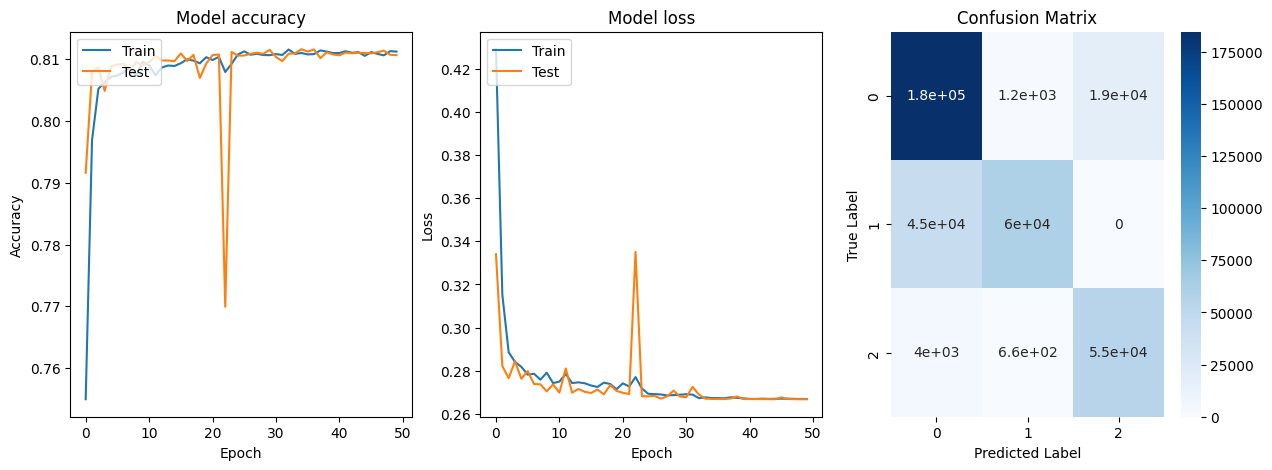

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Load and preprocess the data
X = merged_df.drop(['med_code','pat_id'], axis=1)
y = merged_df['med_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reshape input data to 4D tensor with shape (samples, rows, cols, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))


# Define the model architecture
# Define the input shape
# Define the model
with tf.device(tf.test.gpu_device_name()):
  model = Sequential()
  # Add the first convolutional layer
  model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=256, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  # model.add(Conv2D(filters=1024, kernel_size=(1, 1), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.2))  
  model.add(Dense(units=3, activation='softmax'))

  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  # Train the model  
  history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=512, validation_data=(X_test_cnn, y_test), callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy:', test_acc)

# Create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Accuracy plot
axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Model accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend(["Train", "Test"], loc="upper left")

# Loss plot
axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Model loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(["Train", "Test"], loc="upper left")

# Generate predictions
y_pred = np.argmax(model.predict(X_test_cnn), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)


# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[2])
axs[2].set_title('Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
# Acetaminophen 325 MG Oral Tablet
# Naproxen sodium 220 MG Oral Tablet
# Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet
# Compute the metrics
target_names = ['Acetaminophen 325 MG Oral Tablet', 'Naproxen sodium 220 MG Oral Tablet', 'Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet'] #, 'Lifestyle education regarding hypertension', 'Physical therapy procedure']  # replace ... with other class names
print(classification_report(np.argmax(y_test, axis=-1), y_pred, target_names=target_names))


                                                     precision    recall  f1-score   support

                   Acetaminophen 325 MG Oral Tablet       0.79      0.90      0.84    205255
                 Naproxen sodium 220 MG Oral Tablet       0.97      0.57      0.72    104990
Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet       0.74      0.92      0.82     59592

                                           accuracy                           0.81    369837
                                          macro avg       0.83      0.80      0.79    369837
                                       weighted avg       0.83      0.81      0.80    369837



### Correlation between the columns and Update
As you can see the condition code have low extent correlation with medication code. We can consider to remove the condition code from the dataframe and compare with previous implementation.

In [ ]:
import pandas as pd
import numpy as np
from utils import get_patients_list, generate_patient_dataframe, gen_new_dataframe

# Load hypothesis1 case
merged_df = pd.read_csv('synthea_sample_data_csv_apr2020/csv/hypothesis3.csv')
merged_df = merged_df.drop({'cond_code'}, axis=1)
merged_df = merged_df.drop_duplicates(keep='first', ignore_index=True)
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Print the correlation matrix
print(corr_matrix)

                Age    Gender    Ethnic      Race  obs_code  alrg_code  \
Age        1.000000  0.090498 -0.085931  0.135065 -0.218266  -0.151545   
Gender     0.090498  1.000000 -0.029098  0.251057 -0.034422  -0.015619   
Ethnic    -0.085931 -0.029098  1.000000 -0.131084  0.025072  -0.030228   
Race       0.135065  0.251057 -0.131084  1.000000 -0.012870  -0.093140   
obs_code  -0.218266 -0.034422  0.025072 -0.012870  1.000000   0.028259   
alrg_code -0.151545 -0.015619 -0.030228 -0.093140  0.028259   1.000000   
imm_code   0.356618  0.134549 -0.138121  0.112881 -0.074692  -0.034654   
care_code  0.211925 -0.010400  0.104598  0.052719 -0.053434  -0.054645   
med_code   0.293397  0.145645 -0.130099  0.303208 -0.044432  -0.053951   

           imm_code  care_code  med_code  
Age        0.356618   0.211925  0.293397  
Gender     0.134549  -0.010400  0.145645  
Ethnic    -0.138121   0.104598 -0.130099  
Race       0.112881   0.052719  0.303208  
obs_code  -0.074692  -0.053434 -0.044432  
a

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 1, 32)          128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 1, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 64)          6208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 128)         8320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

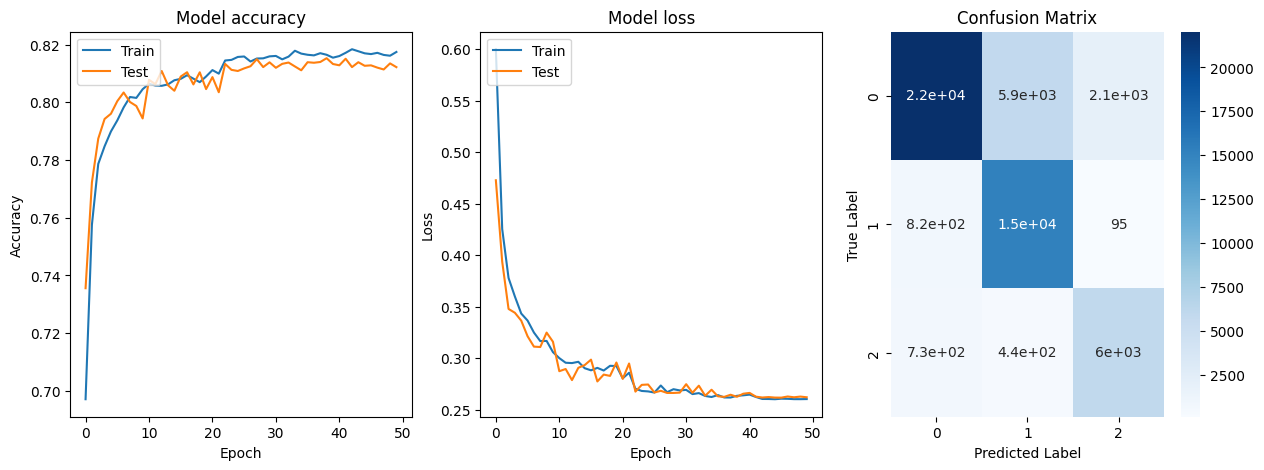

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Load and preprocess the data
X = merged_df.drop(['med_code','pat_id'], axis=1)
y = merged_df['med_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reshape input data to 4D tensor with shape (samples, rows, cols, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))


# Define the model architecture
# Define the input shape
# Define the model
with tf.device(tf.test.gpu_device_name()):
  model = Sequential()
  # Add the first convolutional layer
  model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Conv2D(filters=256, kernel_size=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  # model.add(Conv2D(filters=1024, kernel_size=(1, 1), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 1), strides=(2,1), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.2))  
  model.add(Dense(units=3, activation='softmax'))

  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  # Train the model  
  history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=512, validation_data=(X_test_cnn, y_test), callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy:', test_acc)

# Create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Accuracy plot
axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Model accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend(["Train", "Test"], loc="upper left")

# Loss plot
axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Model loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(["Train", "Test"], loc="upper left")

# Generate predictions
y_pred = np.argmax(model.predict(X_test_cnn), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)


# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[2])
axs[2].set_title('Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
# Acetaminophen 325 MG Oral Tablet
# Naproxen sodium 220 MG Oral Tablet
# Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet
# Compute the metrics
target_names = ['Acetaminophen 325 MG Oral Tablet', 'Naproxen sodium 220 MG Oral Tablet', 'Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet'] #, 'Lifestyle education regarding hypertension', 'Physical therapy procedure']  # replace ... with other class names
print(classification_report(np.argmax(y_test, axis=-1), y_pred, target_names=target_names))


                                                     precision    recall  f1-score   support

                   Acetaminophen 325 MG Oral Tablet       0.93      0.74      0.82     29964
                 Naproxen sodium 220 MG Oral Tablet       0.71      0.94      0.81     16158
Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet       0.74      0.84      0.78      7150

                                           accuracy                           0.81     53272
                                          macro avg       0.79      0.84      0.80     53272
                                       weighted avg       0.84      0.81      0.81     53272



We can't say that there are some improvements between previous implemenation and above one. However, with remove the condition code in the dataframe, the support number decreased (the number of data in each cases), and training time is faster than previous implementation.